# Examen TNS 2021-2022

## Evaluation
Vous serez évalué par groupe de 3 (à l'exception d'un groupe 4) lors d'une soutenance orale de 10 min lors de laquelle vous présenterez vos travaux. La présentation se fera en détaillant le notebook. La note sera principalement basée sur votre capacité à restituer de façon claire les notions de cours. Il est donc essentiel d'introduire dans le notebook la logique de votre travail.
La présentation se fait à trois voix et sera suivi q'une séance de questions.

les notebooks devront être transmis par e-mail 2 jours avant la restitution orale

Les données devront mettre en oeuvre des traitements relatifs au cours TNS (donc essentiellement sur des signaux et non des méthodes de traitement d'image)

## Description de l'examen
L'examen a pour but de traiter un radargramme c'est-à-dire les données acquises par un géoradar.

Le géoradar est composé d’un châssis équipé de deux ou quatre roues sur lequel est posé en son centre l’antenne émettrice ('E') et l’antenne réceptrice ('R') très proches du sol. Il dispose également d’un odomètre qui positionne spatialement les réflexions enregistrées sous forme de signal 1D.

<img src="img/Georadar.PNG" style="height:200px">

Le géoradar émet une onde électromagnétique dans le sol sous forme de brèves impulsions à intervalle
régulier. La forme de l’impulsion émise ressemble à une ondelette de Ricker. Lorsque l’onde rencontre une discontinuité, qui se traduit par une différence de permittivité diélectrique entre deux milieux, une partie de l’énergie est réfléchie et une autre transmise. L’ensemble des ondes réfléchies parvenant jusqu’à l’antenne réceptrice est enregistré en fonction du temps.
À chaque impulsion émise, une réponse que l’on appelle trace (ou A-Scan), est stockée sous forme de signal monodimensionnel. L’opérateur, en déplaçant le géoradar va collecter un ensemble de traces qui formeront un radargramme (ou B-Scan)

<img src="img/fonctionnement_georadar.PNG" style="height:350px">
<img src="img/fonctionnement_georadar2.PNG" style="height:350px">

## Les données
Pour le radargramme traité, les signaux sont enregistrés pendant 62 ns et la longueur de déplacement est de 13 m.

 ### Clutter
La configuration d’antenne avec l’émetteur et le récepteur à la fois très proche l’un de l’autre et très proche du sol implique qu’un premier enregistrement survient très rapidement, appelé onde directe. L’onde directe est très peu atténuée et par conséquent le signal enregistré a une très forte amplitude. De plus, la multiple-réverbération de l’onde avec la surface fait apparaître des formes très horizontales en arrière-plan qui se répètent verticalement sur le radargramme, appelé ringing en anglais.

### Bruit
Le bruit provient de perturbations aléatoires issues des appareils de mesures. Du fait de la très large bande passante de l’antenne, le bruit peut également apparaitre à la suite de l’enregistrement des signaux provenant des ondes électromagnétiques
dans l’air issues des antennes de radio-transmission et des appareils téléphoniques. Dans ce dernier cas des artefacts en forme de colonne apparaissent sur les données. Le bruit apparait essentiellement en fin d’enregistrement d’une trace en l’absence d’information et rehaussé par le gain appliqué en profondeur.

<img src="img/artefacts.PNG" style="height:200px">

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scipy.io
# Chargement d'un radargramme

gprdata = scipy.io.loadmat('DZT_GDF001.mat')

bs = gprdata['radarDZT']

Text(0.5, 1.0, 'Intensity over the distance for fixed time=100')

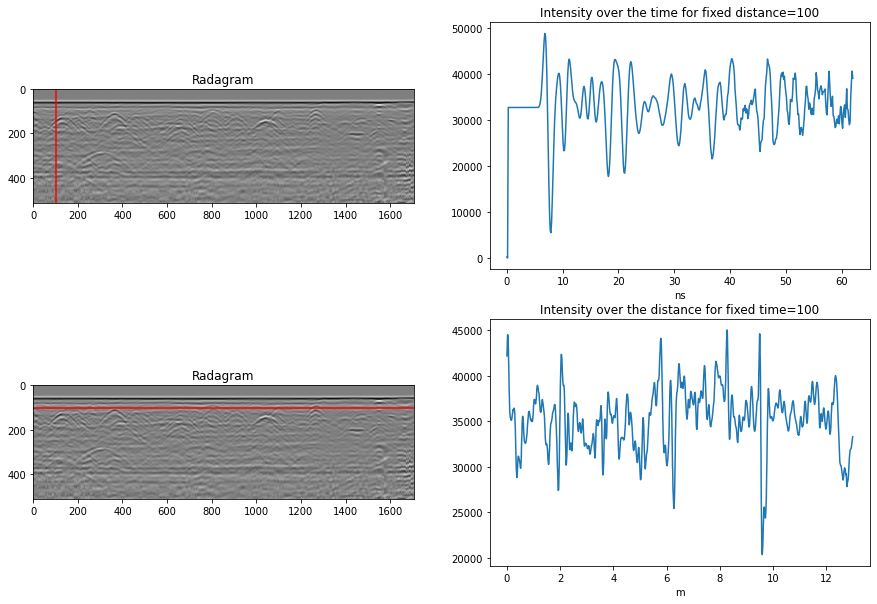

In [3]:
# Visualisation d'un radargramme

plt.figure(figsize=(15,10))

x = bs[:,100]
t = np.linspace(0,62,x.size) #ecoute pendant 62 ns

plt.subplot(221)
plt.axvline(x=100, color="red")
plt.imshow(bs,'gray')# illustration du radargramme
plt.title("Radagram")
plt.subplot(222)
plt.plot(t,x) #chaque colonne du radargramme correspond à un signal
plt.xlabel('ns')
plt.title("Intensity over the time for fixed distance=100")


y = bs[100, :]
d = np.linspace(0,13,y.size) #ecoute pendant 13 m

plt.subplot(223)
plt.axhline(y=100, color="red")
plt.imshow(bs,'gray')# illustration du radargramme
plt.title("Radagram")
plt.subplot(224)
plt.plot(d, y) #chaque ligne du radargramme correspond à un signal
plt.xlabel('m')
plt.title("Intensity over the distance for fixed time=100")

## Analyse spectrale
A faire selon l'axe temporel et l'axe spatial en 1D

### Visualisation du signal

#### Signal en fonction du temps


Regardons l'évolution du signal en fonction du temps. C'est à dire qu'on fixe la distance.

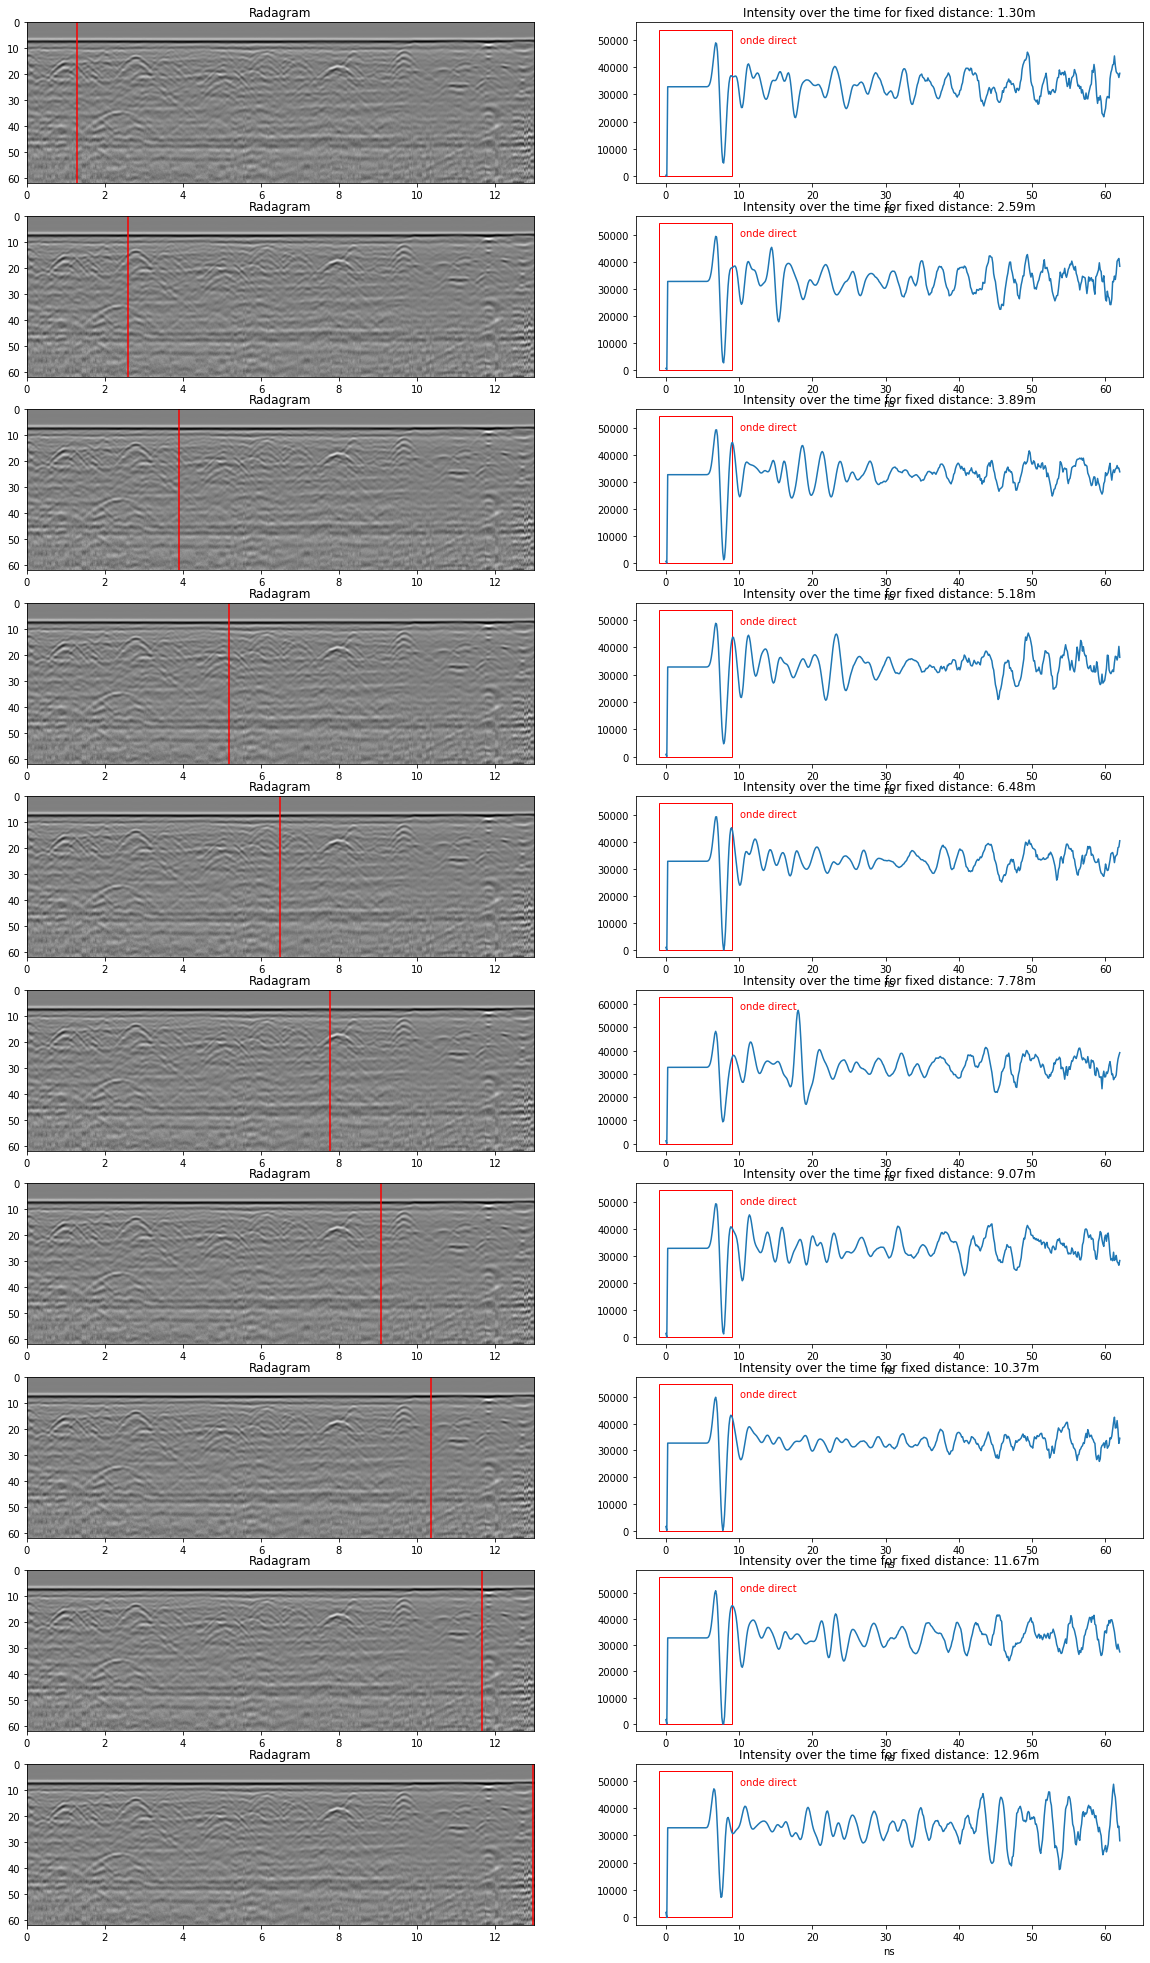

In [4]:
import matplotlib.patches

NROWS = 10
fig, ax = plt.subplots(10, 2, figsize=(20,35))

step = bs.shape[1] // NROWS

for i in range(NROWS):
    band = (1+i)*step
    x = bs[:,band]
    x_max = int(np.max(x))
    x_max = x_max + 0.1 * x_max
    t = np.linspace(0,62,x.size)

    ax[i, 0].axvline(x=band / bs.shape[1] * 13, color="red")
    ax[i, 0].imshow(bs,'gray', extent=[0,13,62,0], aspect="auto")# illustration du radargramme
    ax[i, 0].set_title("Radagram")
    
    ax[i, 1].plot(t, x)
    ax[i, 1].set_xlabel('ns')
    ax[i, 1].set_title("Intensity over the time for fixed distance: " +\
                       "{:.2f}".format(band / bs.shape[1] * 13) + "m")

    
    # Create a Rectangle patch
    rect = matplotlib.patches.Rectangle((-1, x_max), 10, -x_max, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax[i, 1].add_patch(rect)
    ax[i, 1].text(10.1, x_max - 5000, "onde direct", color='red')

**Commentaires**:
* On peut clairement voir l'onde direct à environ 8ns. Cette onde est presénte peut importe la distance effectué par le radargramme.
* Le signal ne semble pas plus bruité malgré la distance qui augmente

#### Signal en fonction de la distance

Regardons l'évolution du signal en fonction de la distance. C'est à dire qu'on fixe l'axe temporel.

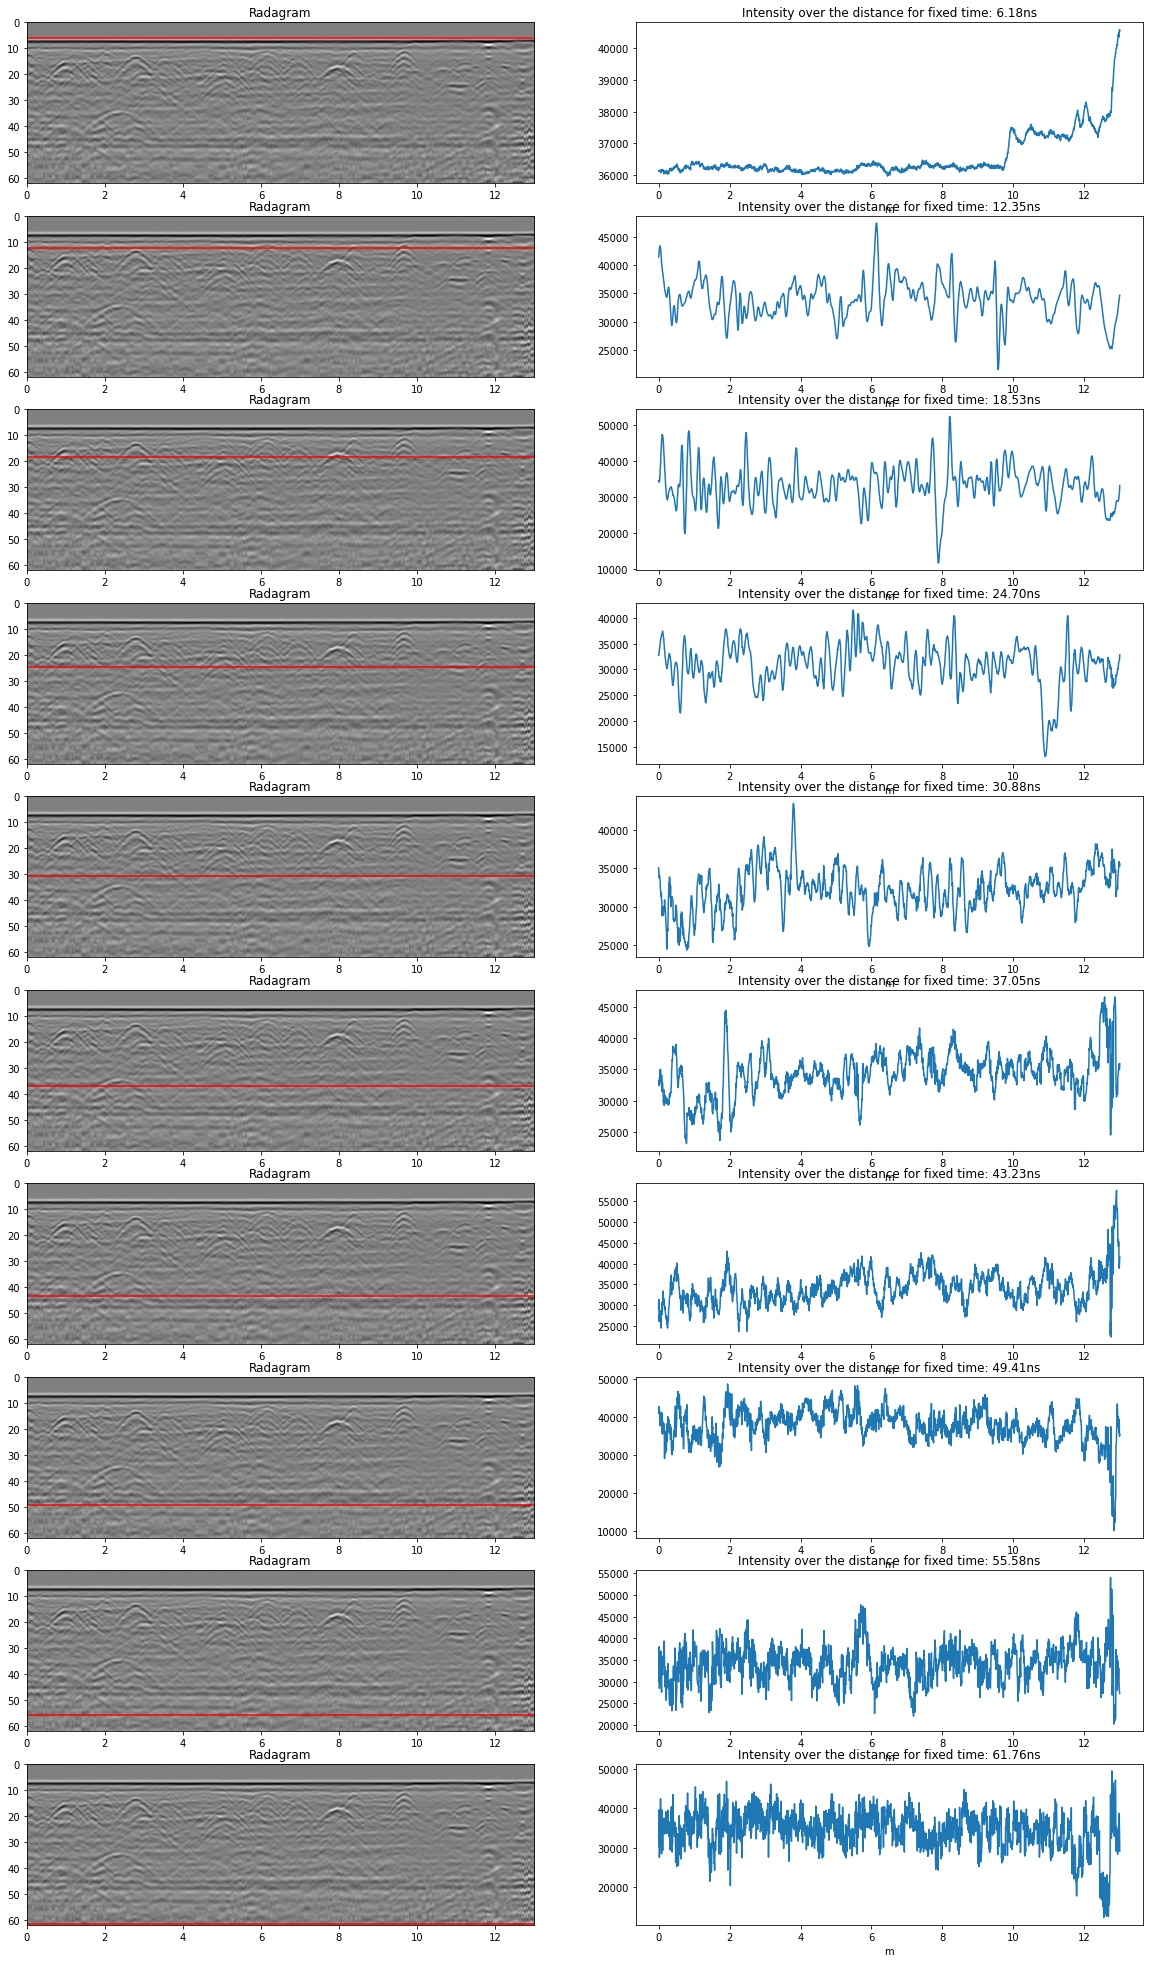

In [5]:
import matplotlib.patches

NROWS = 10
fig, ax = plt.subplots(10, 2, figsize=(20,35))

step = bs.shape[0] // NROWS

for i in range(NROWS):
    band = (1+i)*step
    x = bs[band,:]
    x_max = int(np.max(x))
    x_max = x_max + 0.1 * x_max
    d = np.linspace(0,13,x.size)

    ax[i, 0].axhline(y=band / bs.shape[0] * 62, color="red")
    ax[i, 0].imshow(bs,'gray', extent=[0,13,62,0], aspect="auto")# illustration du radargramme
    ax[i, 0].set_title("Radagram")
    
    ax[i, 1].plot(d, x)
    ax[i, 1].set_xlabel('m')
    ax[i, 1].set_title("Intensity over the distance for fixed time: " +\
                       "{:.2f}".format(band / bs.shape[0] * 62) + "ns")

**Commentaires**:
* Plus le temps est long, plus le signal est bruité.

### Visualisation du signal dans le monde fréquentiel

In [6]:
from scipy.fft import fft, ifft, fftfreq

#### Signal en fonction du temps

In [7]:
band_temp = 500
x_temp = bs[:,band_temp]

# Number of sample points
N = x_temp.shape[0]
# sample spacing
T = 6.2 * 10e-8 / N

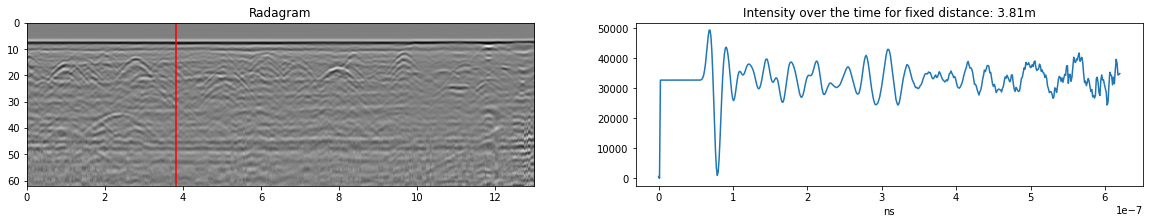

In [8]:
# Plot signal
fig, ax = plt.subplots(1, 2, figsize=(20,3))

t = np.linspace(0, N * T, N)

ax[0].axvline(x=band_temp / bs.shape[1] * 13, color="red")
ax[0].imshow(bs, cmap='gray', extent=[0,13,62,0], aspect="auto")
ax[0].set_title("Radagram")
ax[1].plot(t,x_temp)
ax[1].set_xlabel('ns')
ax[1].set_title("Intensity over the time for fixed distance: " +\
                "{:.2f}".format(band_temp / bs.shape[1] * 13) + "m")
plt.show()

In [9]:
yf = fft(x_temp)
xf = fftfreq(N, T)

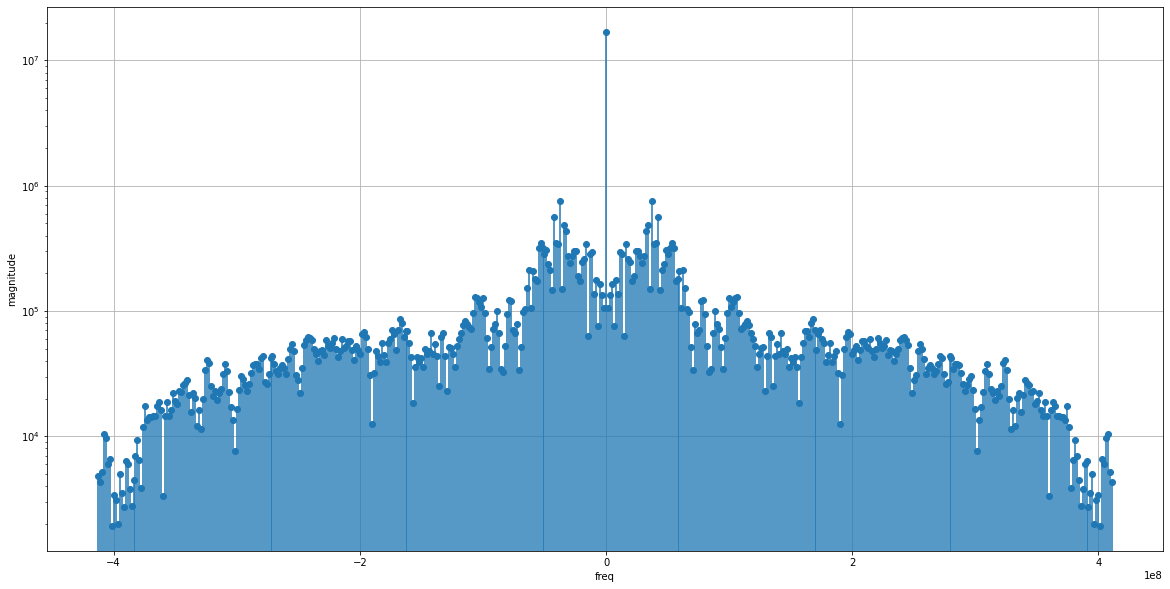

In [10]:
plt.figure(figsize=(20, 10))
plt.stem(xf, np.abs(yf))
plt.xlabel('freq')
plt.ylabel('magnitude')
plt.yscale('log')
plt.grid()
plt.show()

**Commentaires**:
* D'après ce spectre fréquentiel dont on a fixé la distance, on remarque un très gros pic sur sur la fréquence principale puis les amplitudes diminuent en s'écartant de la fréquence central.
* Si on extend pour chaque distance en 2D, on peut prévoir qu'il y aura deux pic horizontal symétrique en ligne horiwontal autour les fréquences centrales.

In [11]:
yfinv = np.abs(ifft(yf))

Text(0.5, 0, 's')

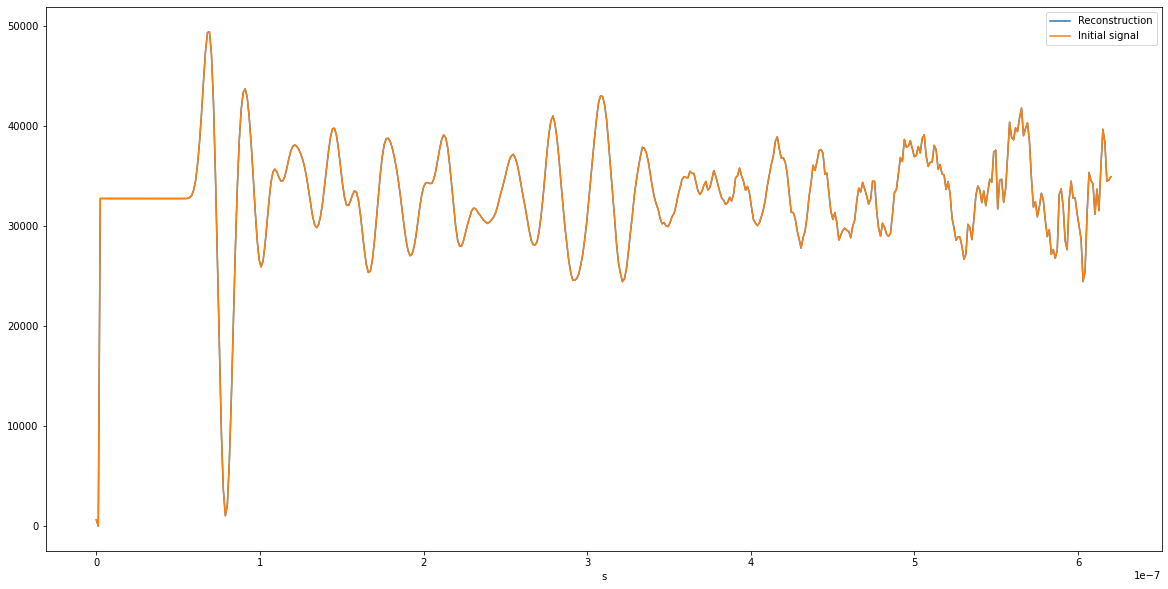

In [12]:
# Just pour vérification
plt.figure(figsize=(20,10))
plt.plot(t, yfinv, label='Reconstruction')
plt.plot(t, x_temp, label='Initial signal')
plt.legend()
plt.xlabel('s')

#### Signal en fonction de la distance

In [13]:
band_space = 150

x_space = bs[band_space, :]

# Number of sample points
N = x_space.shape[0]
# sample spacing
T = 13 / N
t = np.linspace(0, N * T, N)

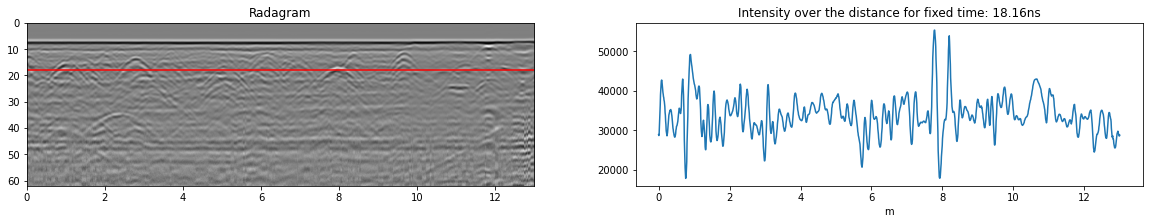

In [14]:
# Plot signal
fig, ax = plt.subplots(1, 2, figsize=(20,3))

t = np.linspace(0, N * T, N)

ax[0].axhline(y=band_space / bs.shape[0] * 62, color="red")
ax[0].imshow(bs, cmap='gray', extent=[0,13,62,0], aspect="auto")
ax[0].set_title("Radagram")
ax[1].plot(t, x_space)
ax[1].set_xlabel('m')
ax[1].set_title("Intensity over the distance for fixed time: " +\
                "{:.2f}".format(band_space / bs.shape[0] * 62) + "ns")
plt.show()

In [15]:
yf = fft(x_space)
xf = fftfreq(N, T)

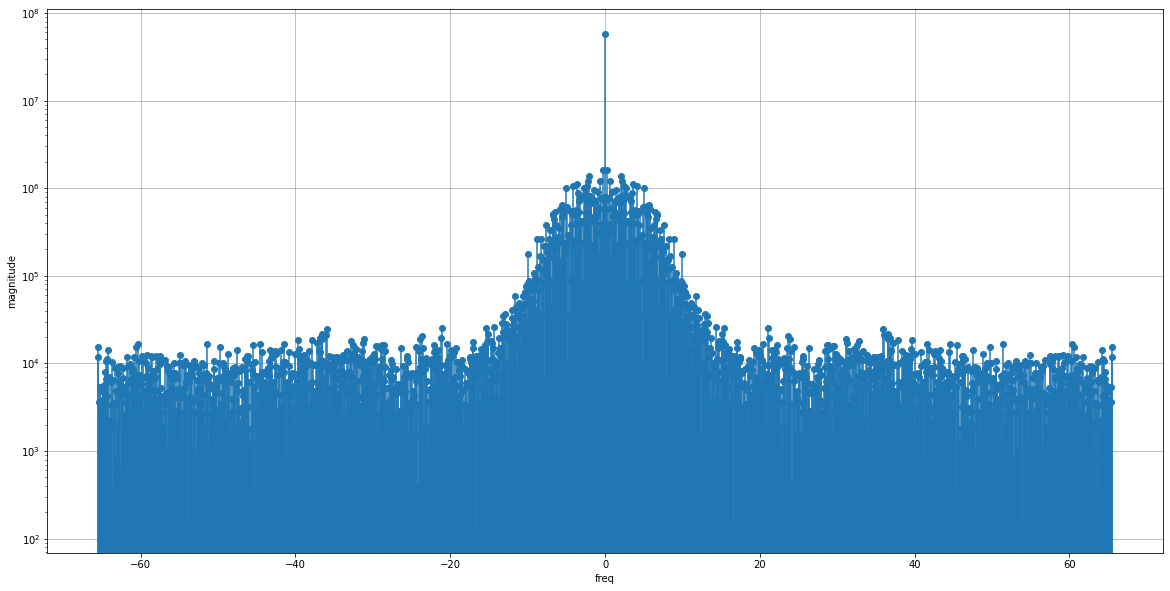

In [16]:
plt.figure(figsize=(20, 10))
plt.stem(xf, np.abs(yf))
plt.xlabel('freq')
plt.ylabel('magnitude')
plt.yscale('log')
plt.grid()
plt.show()
# Echelle logarithmique!

**Commentaires**:
* D'après ce spectre fréquentiel dont on a fixé le temps, on remarque un très gros pic sur sur la fréquence principale.
* Si on extend pour chaque temps en 2D, on peut prévoir qu'il y aura un pic en ligne vertical sur les fréquences centrales.
* Il pourrait être intéressant de filtrer ce pic (pass ou rejecting filtre)

Text(0.5, 0, 'm')

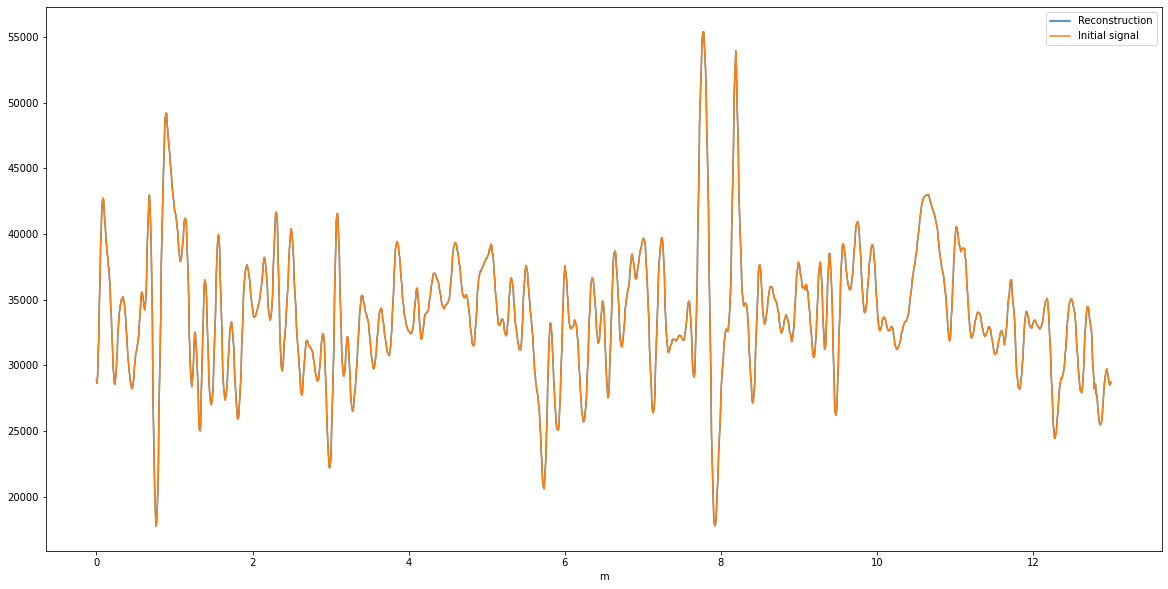

In [17]:
# Just pour vérification
yfinv = np.abs(ifft(yf))
plt.figure(figsize=(20,10))
plt.plot(t, yfinv, label='Reconstruction')
plt.plot(t, x_space, label='Initial signal')
plt.legend()
plt.xlabel('m')

## Traitement des données

### Transformée de Fourier 2D

In [18]:
bsf = np.fft.fft2(bs)
bsf = np.fft.fftshift(bsf)

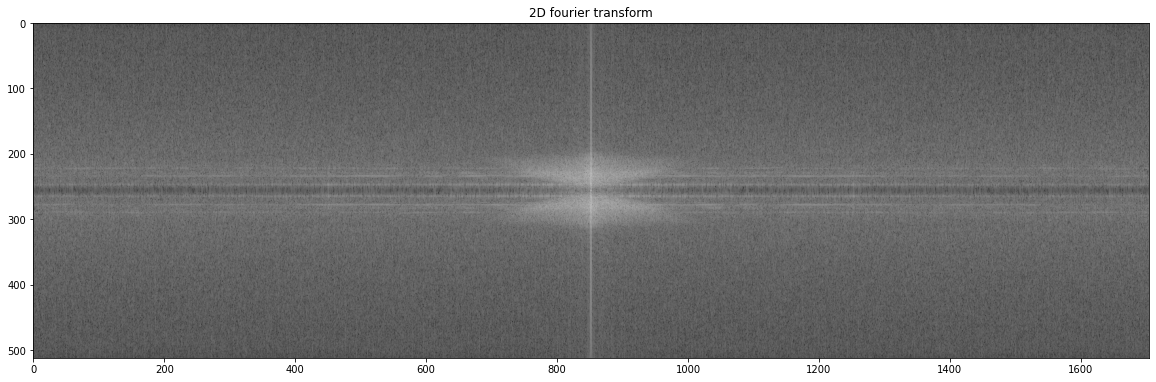

In [19]:
plt.figure(figsize=(20, 10))
plt.imshow(np.log(np.abs(bsf)), cmap='gray')
plt.title("2D fourier transform")
plt.show()

**Commentaires**:
* Comme nous avons vu sur la partie précédente, on retrouve une amplitude très elevé sur une ligne vertical centré et des amplitudes décroissantes sur les lignes horizontales.
* Essayons de filtrer ce spectre fréquentiel.

### Filtrage

* Nous voulons filtrer le signal d'entré afin de le débruiter.
* Nous voulons aussi supprimé les intensité du **signal direct**
* Nous allons filtrer en rejetant les basses fréquences et gardant les hautes fréquence avec un filtre vertical.

In [20]:
from math import pi, sqrt, exp

def gauss(n=11,sigma=10):
    r = range(-int(n/2),int(n/2)+1)
    return [1 / (sigma * sqrt(2*pi)) * exp(-float(x)**2/(2*sigma**2)) for x in r]

In [21]:
low_rejection_filter = np.repeat(np.expand_dims(gauss(bs.shape[1]), axis=0), bs.shape[0], axis=0)

In [22]:
low_rejection_filter = np.max(low_rejection_filter) - low_rejection_filter

Text(0.5, 1.0, 'Low frequency rejection filter')

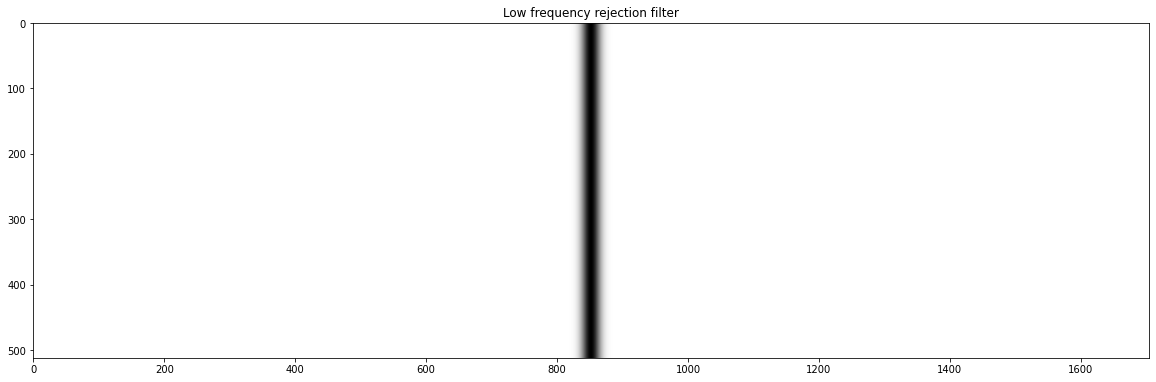

In [23]:
plt.figure(figsize=(20, 10))
plt.imshow(low_rejection_filter, cmap='gray')
plt.title("Low frequency rejection filter")

In [24]:
filtered_bsf = low_rejection_filter * bsf

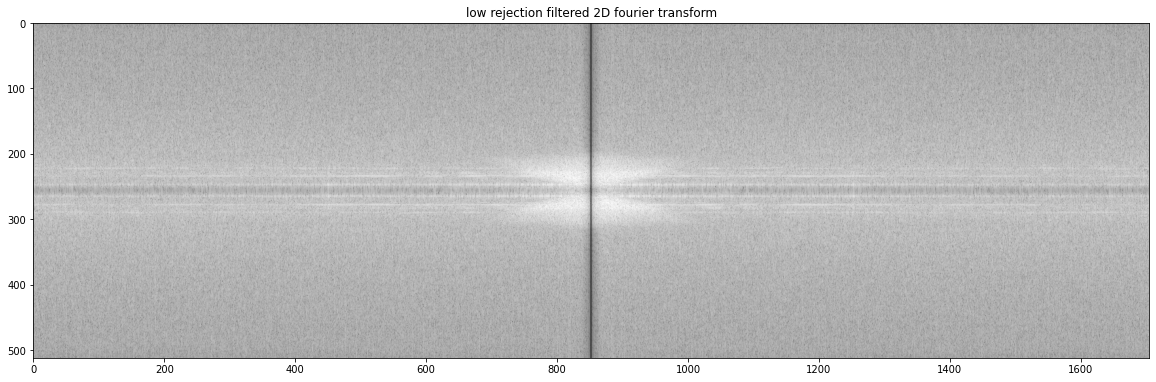

In [25]:
plt.figure(figsize=(20, 10))

filtered_bsf_tmp = np.abs(filtered_bsf)
filtered_bsf_tmp = np.clip(filtered_bsf_tmp, a_min=0.1, a_max=filtered_bsf_tmp.max())

plt.imshow(np.log(filtered_bsf_tmp), cmap='gray')
plt.title("low rejection filtered 2D fourier transform")
plt.show()

In [26]:
filtered_bsf = np.fft.ifftshift(filtered_bsf)
bs_rec = np.abs(np.fft.ifft2(filtered_bsf))

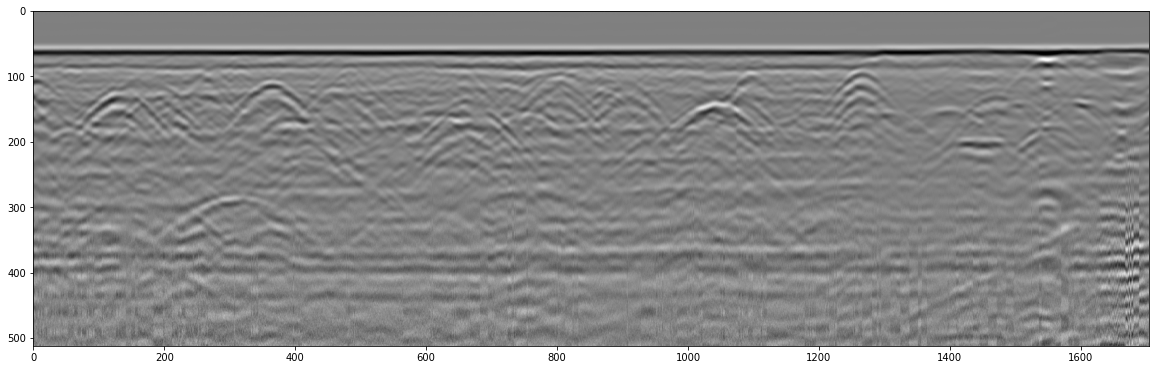

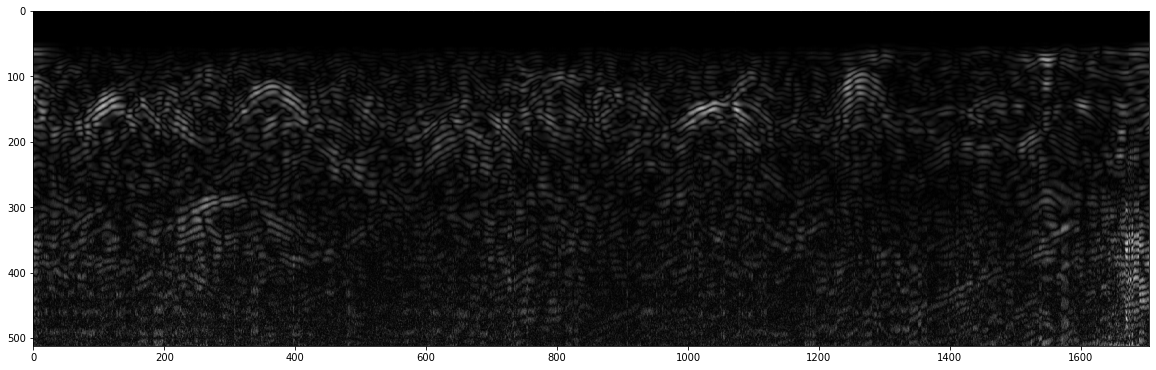

In [27]:
plt.figure(figsize=(20, 10))
plt.imshow(bs, cmap='gray')
plt.show()

plt.figure(figsize=(20, 10))
plt.imshow(bs_rec, cmap='gray')
plt.show()

**Conclusion**:
* Notre signal a été débruité.
* Le **signal direct** a été supprimé du signal
* Il ne reste plus que les intensité importantes pour détecter les objets